In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/sentiment140/training.1600000.processed.noemoticon.csv


In [2]:
# Define data directory
data_dir = '/kaggle/input/sentiment140'

In [3]:
#  Walk through the directory and print out file names
for dirname, _, filenames in os.walk(data_dir):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/sentiment140/training.1600000.processed.noemoticon.csv


In [4]:
# Define file path
file_path = os.path.join(data_dir, 'training.1600000.processed.noemoticon.csv')

In [5]:
# Load your data into a pandas dataframe
df = pd.read_csv(file_path, encoding='latin1') # This dataset requires latin1 encoding

In [6]:
# Check data
df.head()

,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


### Data has no headings so will give them some:


In [7]:
df = pd.read_csv(file_path, encoding='latin1', names=['target', 'ids', 'date', 'flag', 'user', 'text'])

# Check categories added:
df.head()

,target,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


Only the sentiment aka "target" and "text" are relevant for the machine learnign model, so other columns will be dropped

In [8]:
# Drop unnecessary columns
df = df.drop(columns=['ids', 'date', 'flag', 'user'])

# Then checking data visually
df.head()

,target,text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."


In [9]:
# Checking "shape" of data.. how many rows and columns
# df.shape # returns a tuple of info - columns and rows
def print_df_shape(datafield):
    print("Data field contains:")
    print(f"Rows {datafield.shape[0]}")
    print(f"Columns {datafield.shape[1]}")
    
print_df_shape(df)

Data field contains:
Rows 1600000
Columns 2


### Cannot see any other values in target other than 0, so checking to see that there are also values of "4" in the "target" column. However this will also reveal whetehr there are any other values that may need to me removed/cleaned

In [10]:
# Checking unique values in the "target" column
unique_targets = df['target'].unique()
print("Unique values in the 'target' column:")
print(unique_targets)

Unique values in the 'target' column:
[0 4]


### No other values in target column other than 0 and 4. So no cleaning required, However I check should be done to see that there are equal 0 and 4 values to ensure or atleast reduce bias

In [11]:
# Checking the count of each unique value in the "target" column
target_counts = df['target'].value_counts()

# Print the result
print("Counts of unique values in the 'target' column:")
print(target_counts)

Counts of unique values in the 'target' column:
0    800000
4    800000
Name: target, dtype: int64


### This reveals there is an equal split of 80k postive and negative tweets, to eliminate bias in this regard atleast

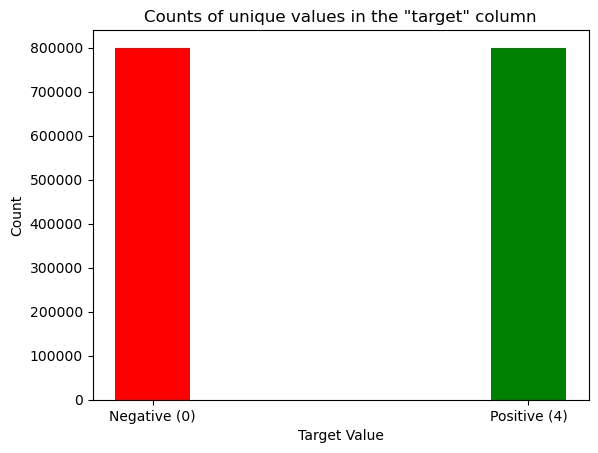

In [12]:
import matplotlib.pyplot as plt

# Sorting the index so 0 comes before 4
target_counts.sort_index(inplace=True)

# Explicitly specifying colors in the same order as the sorted index
colors = ['red', 'green']

# Create a bar plot
plt.bar(target_counts.index, target_counts.values, color=colors)

# Add labels and title
plt.xlabel('Target Value')
plt.ylabel('Count')
plt.title('Counts of unique values in the "target" column')

# Customizing the x-axis to match specific labels
plt.xticks(target_counts.index, ['Negative (0)', 'Positive (4)'])

# Show the plot
plt.show()


In [13]:
# Checking information of columns so can test understand their data type, i.e. incase target is a char/string/object instead of int
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 2 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   target  1600000 non-null  int64 
 1   text    1600000 non-null  object
dtypes: int64(1), object(1)
memory usage: 24.4+ MB


In [14]:
# Show how much missing data
print(df.isnull().sum())

target    0
text      0
dtype: int64


### No data is missing. Previously checked all data in target column is 0 or 4 so no cleaning is required there.
#### However even though the data says noemoticon, it is bst to check this is true

In [15]:
df.info()
print_df_shape(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 2 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   target  1600000 non-null  int64 
 1   text    1600000 non-null  object
dtypes: int64(1), object(1)
memory usage: 24.4+ MB
Data field contains:
Rows 1600000
Columns 2


In [16]:
# importing regex to help with text processing and pattern matching tasks
import re

# Define a function that checks if an emoticon is present in a string
def contains_emoticon(s):
    emoticon_pattern = r'[:;=8][\-^]?[DP()\[\]{}|\\/><3OoPp@*#]'
    return bool(re.search(emoticon_pattern, s))

# Apply this function to every row in your 'text' column
df['contains_emoticon'] = df['text'].apply(contains_emoticon)

# Check if any rows contain emoticons
print(df['contains_emoticon'].any())


True


In [17]:
### As true was returned, there are emoticons in the text data, but these could aid in the training of the model.
#### I will consider training models with and without emoticons and potentially compare whicih is more accurate.

In [18]:
print(df)
print_df_shape(df)

         target                                               text  \
0             0  @switchfoot http://twitpic.com/2y1zl - Awww, t...   
1             0  is upset that he can't update his Facebook by ...   
2             0  @Kenichan I dived many times for the ball. Man...   
3             0    my whole body feels itchy and like its on fire    
4             0  @nationwideclass no, it's not behaving at all....   
...         ...                                                ...   
1599995       4  Just woke up. Having no school is the best fee...   
1599996       4  TheWDB.com - Very cool to hear old Walt interv...   
1599997       4  Are you ready for your MoJo Makeover? Ask me f...   
1599998       4  Happy 38th Birthday to my boo of alll time!!! ...   
1599999       4  happy #charitytuesday @theNSPCC @SparksCharity...   

         contains_emoticon  
0                     True  
1                    False  
2                    False  
3                    False  
4             

In [19]:
import re

def find_unique_emoticons(s):
    emoticon_pattern = r'[:;=8][\-^]?[DP()\[\]{}|\\/><3OoPp@*#]'
    matches = re.findall(emoticon_pattern, s)
    return list(set(matches))  # Convert the list to a set to get unique emoticons

# Create a copy of the original dataframe
df_copy = df.copy()

# Apply this function to every row in your 'text' column
df_copy['unique_emoticons'] = df_copy['text'].apply(find_unique_emoticons)

# Create a boolean column 'has_emoticon' which is True if 'unique_emoticons' is not empty (i.e., emoticons are present)
df_copy['has_emoticon'] = df_copy['unique_emoticons'].map(len) > 0

# Count the total number of rows that contain emoticons
total_emoticons = df_copy['has_emoticon'].sum()
print(f"Total rows containing emoticons: {total_emoticons}")

# Count the number of rows where 'target' is 4 and an emoticon is present
target4_with_emoticons = df_copy[(df_copy['target'] == 4) & (df_copy['has_emoticon'])].shape[0]
print(f"Rows where 'target' is 4 and emoticon is present: {target4_with_emoticons}")

# Count the number of rows where 'target' is 0 and an emoticon is present
target0_with_emoticons = df_copy[(df_copy['target'] == 0) & (df_copy['has_emoticon'])].shape[0]
print(f"Rows where 'target' is 0 and emoticon is present: {target0_with_emoticons}")

# Count the number of rows without emoticons
rows_without_emoticons = df_copy.shape[0] - total_emoticons
print(f"Rows without emoticons: {rows_without_emoticons}")

# Print the unique emoticons
unique_emoticons = set().union(*df_copy[df_copy['has_emoticon']]['unique_emoticons'])
print("Unique emoticons found in the 'text' column:")
print(unique_emoticons)


Total rows containing emoticons: 118761
Rows where 'target' is 4 and emoticon is present: 73112
Rows where 'target' is 0 and emoticon is present: 45649
Rows without emoticons: 1481239
Unique emoticons found in the 'text' column:
{':-]', ':-D', ';^)', '=\\', ';(', '8-p', ':-3', '=(', '=p', ':-p', '=[', '8p', ':-O', ':^D', ';{', '8@', '8-D', '=-o', ':-}', ';|', ':/', ';-3', ';P', '=-)', ':@', ';-]', ';-P', ':)', ':-|', ';^*', ';-|', ':|', '=o', ':-@', ';-o', ';@', ';-O', ';[', '8-|', ':^)', ':[', '=-P', ';#', ';O', ';/', ';}', ';-)', ';-/', ':-\\', '8)', '8-3', '=P', '8-)', '=*', ':o', '=-\\', ':-*', ':*', ';*', ':\\', ';^@', ';D', '8(', ';3', '8^o', '=}', '83', ';-D', '8]', ';o', ':-/', '8P', ':-o', '={', '8}', ':}', ':-{', '=]', '=3', '8D', '8-/', ':3', '=/', ':(', '=-(', '8O', '=-O', '8[', '8|', '8*', '8-(', ';)', ';^]', ':^O', '=@', '8/', ';-*', ';-@', ';p', ';^#', ';-(', ':-[', '=O', ';-}', ':#', ':-#', '=-D', '8-O', ':{', '8#', '=D', ':^*', '=|', '8o', '=^p', ';-p', ':O', ':]', ';-

In [20]:
print_df_shape(df)

Data field contains:
Rows 1600000
Columns 3


In [21]:
def has_emoji(text):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese characters
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    return bool(emoji_pattern.search(text))

# Apply this function to every row in your 'text' column
df['has_emoji'] = df['text'].apply(has_emoji)

# Count the total number of rows that contain emojis
total_emojis = df['has_emoji'].sum()
print(f"Total rows containing emojis: {total_emojis}")

# Count the number of rows where 'target' is 4 and an emoji is present
target4_with_emojis = df[(df['target'] == 4) & (df['has_emoji'])].shape[0]
print(f"Rows where 'target' is 4 and emoji is present: {target4_with_emojis}")

# Count the number of rows where 'target' is 0 and an emoji is present
target0_with_emojis = df[(df['target'] == 0) & (df['has_emoji'])].shape[0]
print(f"Rows where 'target' is 0 and emoji is present: {target0_with_emojis}")

# Count the number of rows without emojis
rows_without_emojis = df.shape[0] - total_emojis
print(f"Rows without emojis: {rows_without_emojis}")


Total rows containing emojis: 0
Rows where 'target' is 4 and emoji is present: 0
Rows where 'target' is 0 and emoji is present: 0
Rows without emojis: 1600000


In [22]:
df.head()


,target,text,contains_emoticon,has_emoji
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",True,False
1,0,is upset that he can't update his Facebook by ...,False,False
2,0,@Kenichan I dived many times for the ball. Man...,False,False
3,0,my whole body feels itchy and like its on fire,False,False
4,0,"@nationwideclass no, it's not behaving at all....",False,False


In [23]:
print_df_shape(df)

Data field contains:
Rows 1600000
Columns 4


In [24]:
# Many of the "emoticons" could just be part of links i.e. :/ being part of https:/

#### So my method for detecting emoticons is likely flawed, as this is a reputeable dataset which has already removed the emoticons.

# Leaving emoticons column (or atleast what is detected as emoticons in as it may reveal a pattern)

In [25]:
# Checking DF to drop columns back to relevant columns
df.head()
# Dropping irrelevant columns:
columns_to_drop = ['contained_emojis', 'has_emoji', 'emoji_count']

# Only drop the columns that exist in the DataFrame
columns_to_drop = [col for col in columns_to_drop if col in df.columns]

df = df.drop(columns=columns_to_drop)

# Print the DataFrame to see the updated result
df.head()
print_df_shape(df)

# Only drop the columns that exist in the DataFrame
columns_to_drop = [col for col in columns_to_drop if col in df.columns]

df = df.drop(columns=columns_to_drop)


# Print the DataFrame to see the updated result
df.head()
print_df_shape(df)



Data field contains:
Rows 1600000
Columns 3
Data field contains:
Rows 1600000
Columns 3


# TODO BIAS potentially relevant from not using emoji's, pictures, gif's

In [26]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 3 columns):
 #   Column             Non-Null Count    Dtype 
---  ------             --------------    ----- 
 0   target             1600000 non-null  int64 
 1   text               1600000 non-null  object
 2   contains_emoticon  1600000 non-null  bool  
dtypes: bool(1), int64(1), object(1)
memory usage: 25.9+ MB


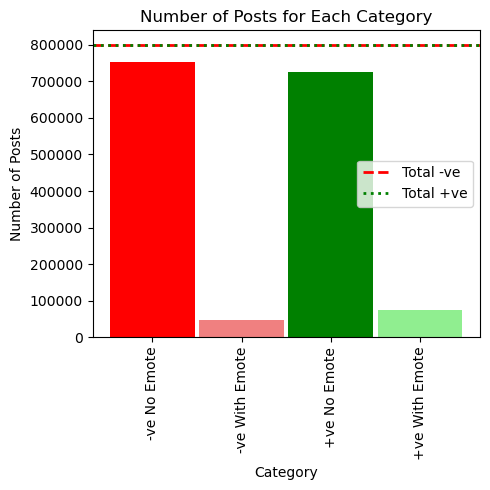

In [27]:
# Group by 'target' and 'contains_emoticon' columns and count occurrences
grouped_df = df.groupby(['target', 'contains_emoticon']).size().reset_index(name='count')

# Bar width
bar_width = 0.95  # Increase this for closer bars

# Bar positions
bar_positions = np.arange(4)

# Getting the counts
no_emoticons_counts_negative = grouped_df[(grouped_df['contains_emoticon'] == False) & (grouped_df['target'] == 0)]['count'].values
with_emoticons_counts_negative = grouped_df[(grouped_df['contains_emoticon'] == True) & (grouped_df['target'] == 0)]['count'].values
no_emoticons_counts_positive = grouped_df[(grouped_df['contains_emoticon'] == False) & (grouped_df['target'] == 4)]['count'].values
with_emoticons_counts_positive = grouped_df[(grouped_df['contains_emoticon'] == True) & (grouped_df['target'] == 4)]['count'].values

# Create a single list with all counts
counts = [no_emoticons_counts_negative[0] if no_emoticons_counts_negative.size > 0 else 0,
           with_emoticons_counts_negative[0] if with_emoticons_counts_negative.size > 0 else 0,
           no_emoticons_counts_positive[0] if no_emoticons_counts_positive.size > 0 else 0,
           with_emoticons_counts_positive[0] if with_emoticons_counts_positive.size > 0 else 0]

# Total positive and negative counts
total_negative = sum(counts[:2])
total_positive = sum(counts[2:])

# Labels for each bar
labels = ['-ve No Emote', '-ve With Emote', '+ve No Emote', '+ve With Emote']

# Colors for each bar
colors = ['red', 'lightcoral', 'green', 'lightgreen']

# Creating a new figure with increased height
fig, ax = plt.subplots(figsize=(5, 5))  # Increased height

# Creating the bar chart
plt.bar(bar_positions, counts, color=colors, tick_label=labels, width=bar_width)

# Adding lines for total positive and negative
plt.axhline(total_negative, color='red', linestyle='dashed', linewidth=2, label='Total -ve')
plt.axhline(total_positive, color='green', linestyle='dotted', linewidth=2, label='Total +ve')

# Labeling
plt.xlabel('Category')
plt.ylabel('Number of Posts')
plt.title('Number of Posts for Each Category')

# Adding a legend
plt.legend()

# Rotating x labels for better visibility
plt.xticks(rotation='vertical')

# Displaying the graph
plt.tight_layout()
plt.show()


In [28]:
### I am interested to see the difference int he number of characters each sentiment post has

In [29]:
# Calculate character count and add a new column to the DataFrame
df['character_count'] = df['text'].apply(lambda x: len(x))

# Display the updated DataFrame with the new column
df.head()


,target,text,contains_emoticon,character_count
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",True,115
1,0,is upset that he can't update his Facebook by ...,False,111
2,0,@Kenichan I dived many times for the ball. Man...,False,89
3,0,my whole body feels itchy and like its on fire,False,47
4,0,"@nationwideclass no, it's not behaving at all....",False,111


In [30]:
def calc_average_character_count(df, target_value, contains_emoticon=None):
    if contains_emoticon is not None:
        filtered_df = df[(df['target'] == target_value) & (df['contains_emoticon'] == contains_emoticon)]
    else:
        filtered_df = df[df['target'] == target_value]
        
    return np.mean(filtered_df['character_count'].values)

def print_average_character_count(text, avg_count):
    print(f"The average {text} sentiment message contains {int(avg_count)} characters.")

# Group by 'target' and 'contains_emoticon' columns and count occurrences
grouped_df = df.groupby(['target', 'contains_emoticon']).size().reset_index(name='count')

# Calculate and print average character count for positive and negative sentiments
for target_value, sentiment in [(0, 'negative'), (4, 'positive')]:
    avg_count = calc_average_character_count(df, target_value)
    print_average_character_count(sentiment, avg_count)
    
    for contains_emoticon, emoticon_text in [(False, 'with no emoticon'), (True, 'with an emoticon')]:
        avg_count = calc_average_character_count(df, target_value, contains_emoticon)
        print_average_character_count(f"{sentiment} {emoticon_text}", avg_count)

The average negative sentiment message contains 74 characters.
The average negative with no emoticon sentiment message contains 73 characters.
The average negative with an emoticon sentiment message contains 92 characters.
The average positive sentiment message contains 73 characters.
The average positive with no emoticon sentiment message contains 72 characters.
The average positive with an emoticon sentiment message contains 90 characters.


In [31]:
df.head()

,target,text,contains_emoticon,character_count
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",True,115
1,0,is upset that he can't update his Facebook by ...,False,111
2,0,@Kenichan I dived many times for the ball. Man...,False,89
3,0,my whole body feels itchy and like its on fire,False,47
4,0,"@nationwideclass no, it's not behaving at all....",False,111


#### Criteria for "contains_emoticon" is flawed due to its sensetivity. It would be possible
#### to try filter out for this and using specificty, but this may also be flawed
#### Will stick to ignoring contains emoticon column
### Also due to average character counts being the same (or atleast very close to it)
### Will ignore character_count and it's relationship with the attemping identification of emoticons

# EDA finished - Moving on to model Training & evaluation

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['target'], test_size=0.2, random_state=42)

# Create a pipeline for text transformation and classification
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', LogisticRegression(solver='liblinear')),
])

# Train and evaluate the classifier
pipeline.fit(X_train, y_train)
predictions_test = pipeline.predict(X_test)
print('Classification report:\n', classification_report(y_test, predictions_test))
print('Accuracy score:', accuracy_score(y_test, predictions_test))

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Classification report:
               precision    recall  f1-score   support

           0       0.81      0.79      0.80    159494
           4       0.80      0.81      0.81    160506

    accuracy                           0.80    320000
   macro avg       0.80      0.80      0.80    320000
weighted avg       0.80      0.80      0.80    320000

Accuracy score: 0.802725


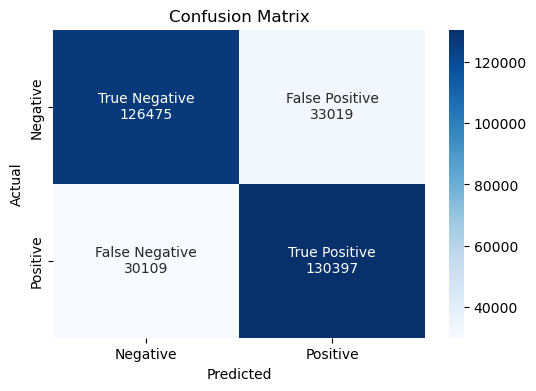

In [33]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Plot the confusion matrix
confusion = confusion_matrix(y_test, predictions_test)

# Define labels for the confusion matrix
labels = np.array([['True Negative', 'False Positive'], ['False Negative', 'True Positive']])

# Define confusion matrix with labels
confusion_labelled = np.zeros_like(confusion, dtype=object)
for i in range(2):
    for j in range(2):
        confusion_labelled[i, j] = f'{labels[i, j]}\n{confusion[i, j]}'

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion, annot=confusion_labelled, cmap='Blues', fmt='', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [34]:
# Function to calculate sentiment weighting
def calculate_sentiment(text):
    probs = pipeline.predict_proba([text])
    sentiment_value = 0 * probs[0][0] + 4 * probs[0][1]
    return 2 if 1.5 < sentiment_value < 2.5 else sentiment_value

# Function to convert sentiment weighting to category
def sentiment_to_category(sentiment_value):
    if sentiment_value <= 0.5:
        return 'Very Negative'
    elif sentiment_value <= 1.5:
        return 'Negative'
    elif sentiment_value <= 2.5:
        return 'Neutral'
    elif sentiment_value <= 3.5:
        return 'Positive'
    else:
        return 'Very Positive'

# Texts to judge sentiment
texts_to_judge_sentiment = ["I am happy", "Why me...", "Have fun!", "Oh man...", "I am a shoe."]

# Loop through each text to predict sentiment, print weighting and category
for text in texts_to_judge_sentiment:
    sentiment_prediction = pipeline.predict([text])[0]
    sentiment_weighting = calculate_sentiment(text)
    sentiment_category = sentiment_to_category(sentiment_weighting)

    print(f'Text: {text}\nSentiment prediction: [{sentiment_prediction}]\nSentiment weighting: {sentiment_weighting}\nSentiment category: {sentiment_category}\n')

Text: I am happy
Sentiment prediction: [4]
Sentiment weighting: 3.934061041450312
Sentiment category: Very Positive

Text: Why me...
Sentiment prediction: [0]
Sentiment weighting: 0.08267303606035564
Sentiment category: Very Negative

Text: Have fun!
Sentiment prediction: [4]
Sentiment weighting: 3.52356218534283
Sentiment category: Very Positive

Text: Oh man...
Sentiment prediction: [0]
Sentiment weighting: 1.2801332992496066
Sentiment category: Negative

Text: I am a shoe.
Sentiment prediction: [4]
Sentiment weighting: 2
Sentiment category: Neutral



### Overall model performs well, see more in report - End